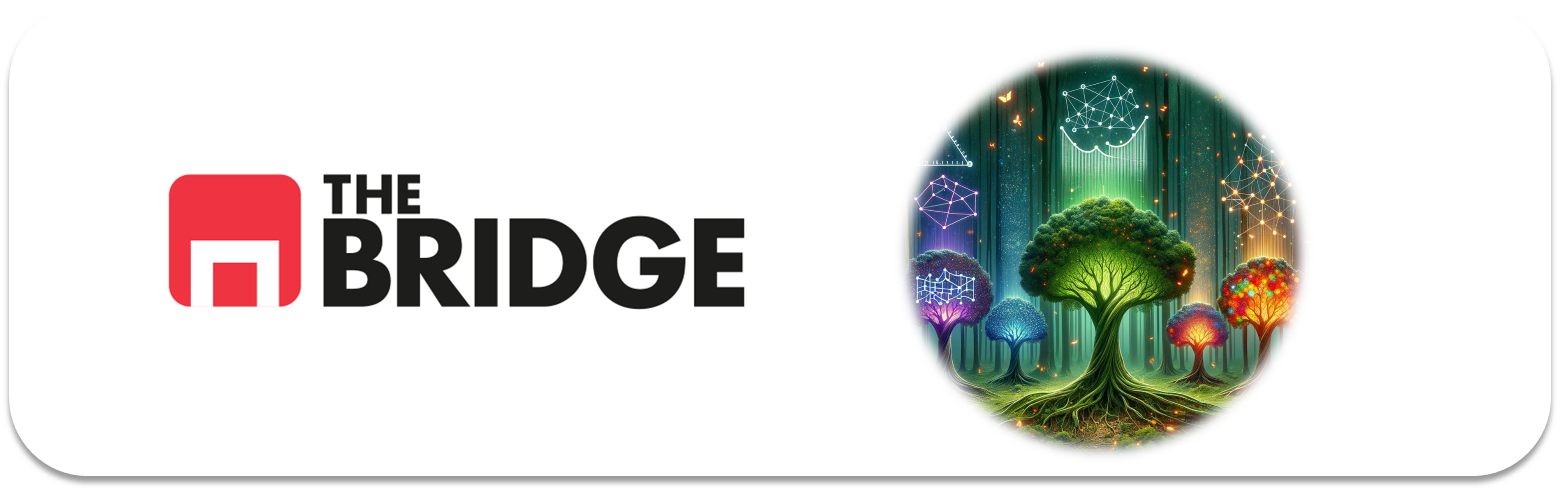

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [2]:
df = pd.read_csv("./data/bank-full.csv",sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df["y"].value_counts(True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

<Axes: >

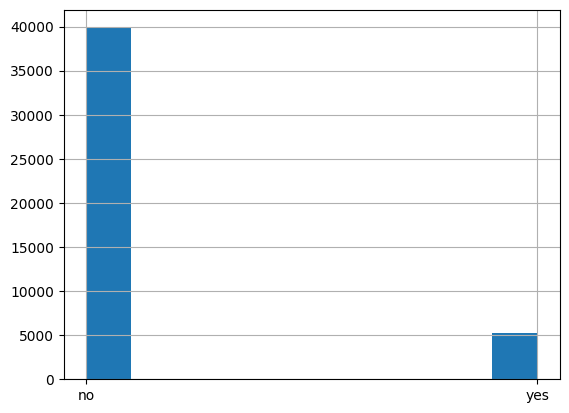

In [6]:
df["y"].hist()

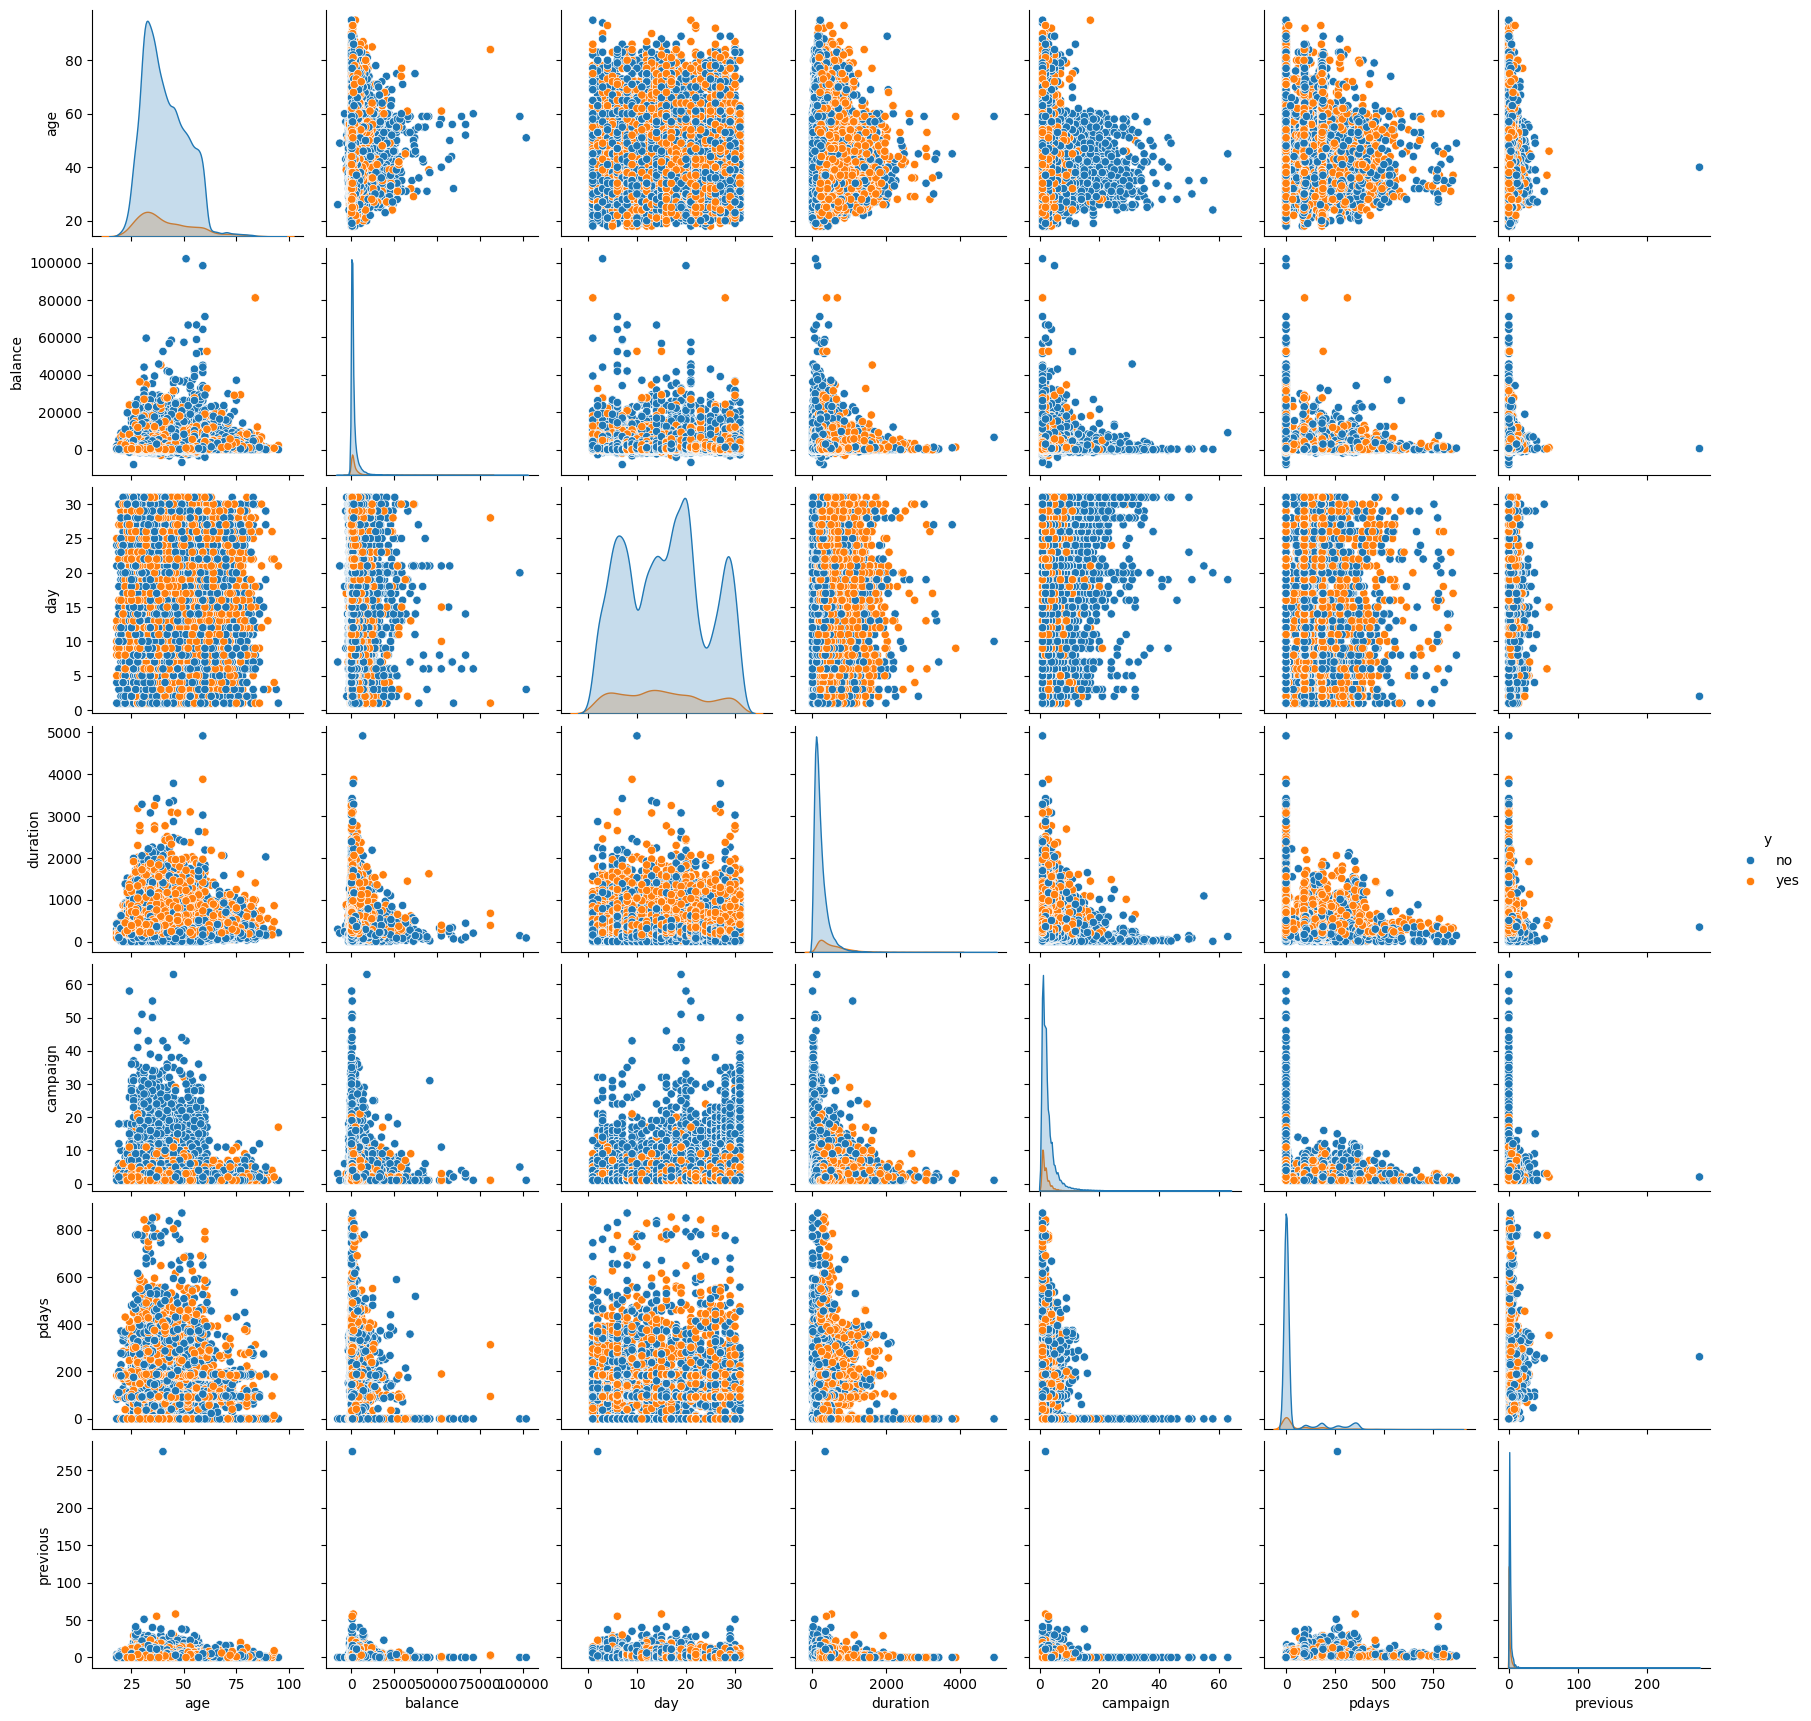

In [7]:
sns.pairplot(df, hue="y")

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df["contact_2"] = df["contact"].copy()
df.loc[df["contact"] != "unknown", "contact_2"] = "known"

In [10]:
df["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [11]:
df["poutcome_2"] = df["poutcome"].copy()
df.loc[df["poutcome"] != "unknown", "poutcome_2"] = "known"

In [12]:
features_cat = ["marital","education","default","housing","loan","month","poutcome_2","contact_2"]
features_num = ["age","balance","day","duration","campaign","pdays","previous"]

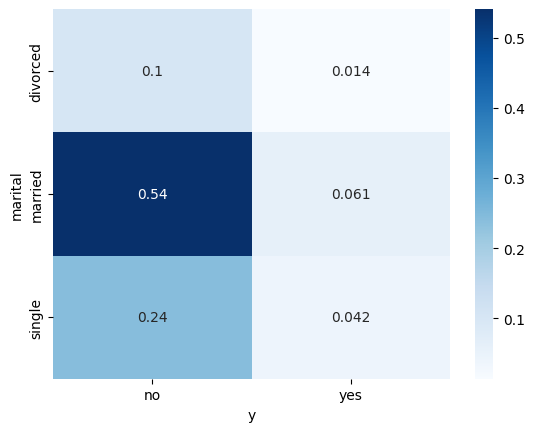

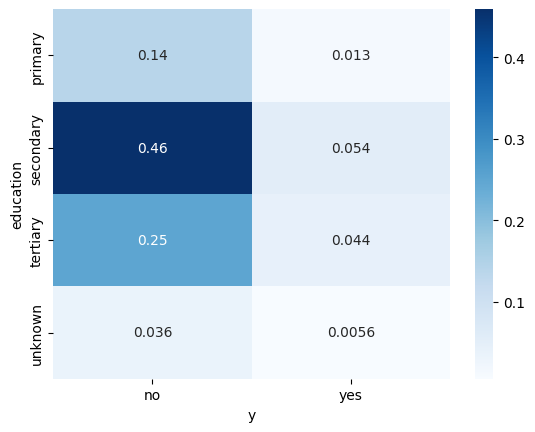

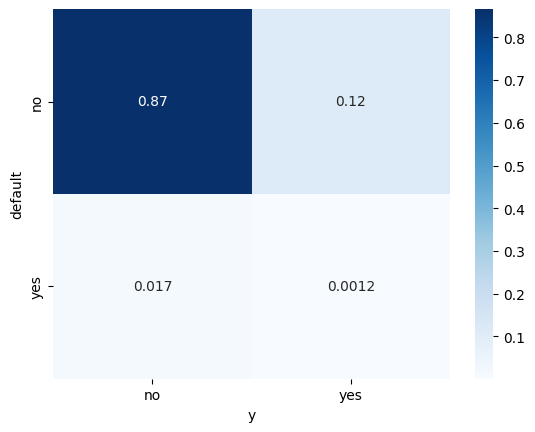

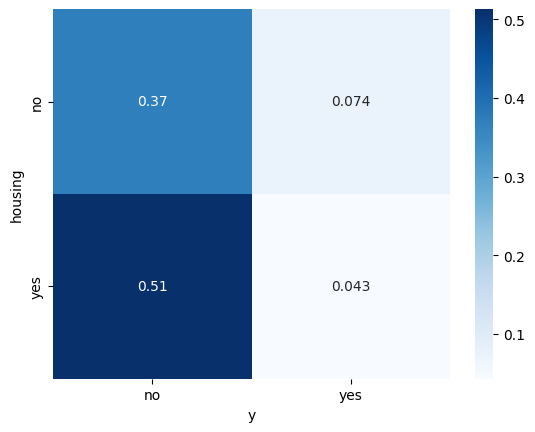

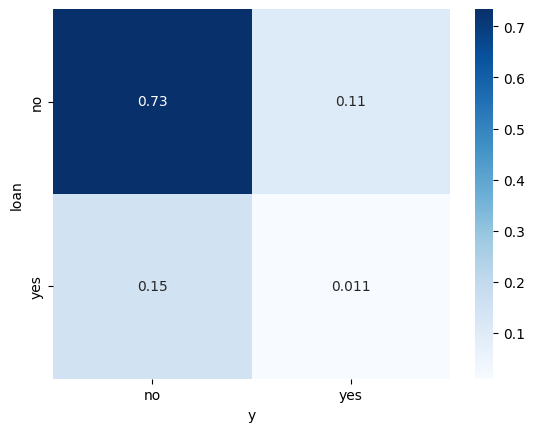

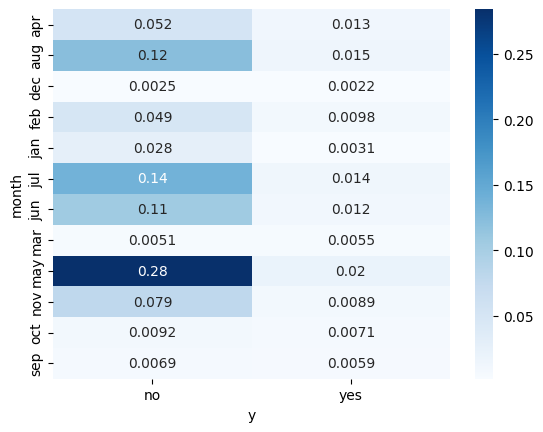

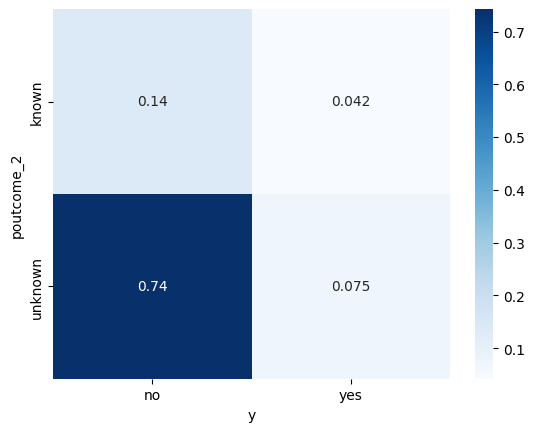

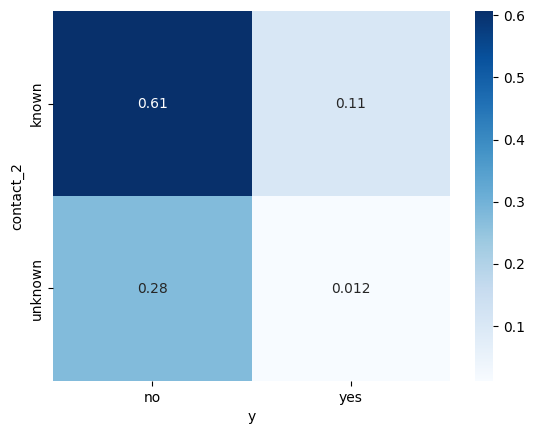

In [13]:
for i in features_cat:
    tabla_contingencia = pd.crosstab(df[i], df["y"],normalize=True)
    plt.figure()
    sns.heatmap(tabla_contingencia, annot=True, cmap="Blues")
    plt.show()

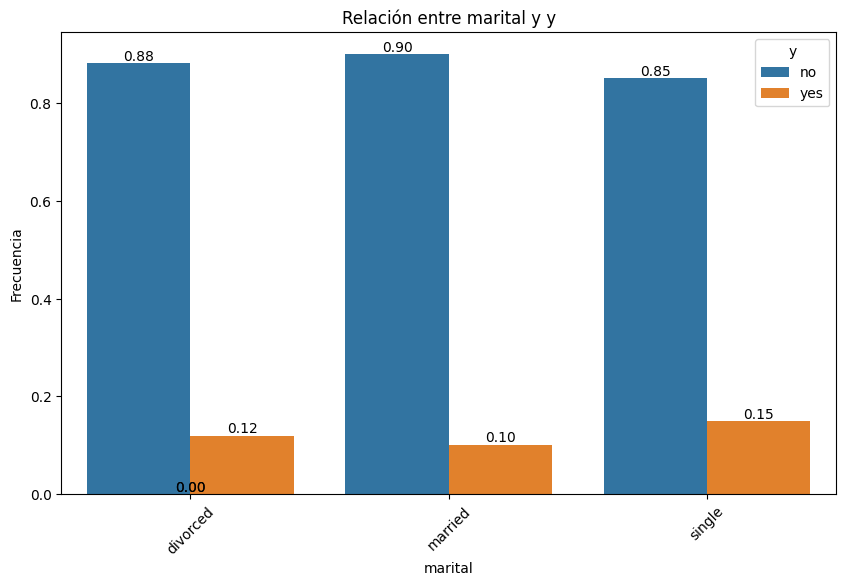

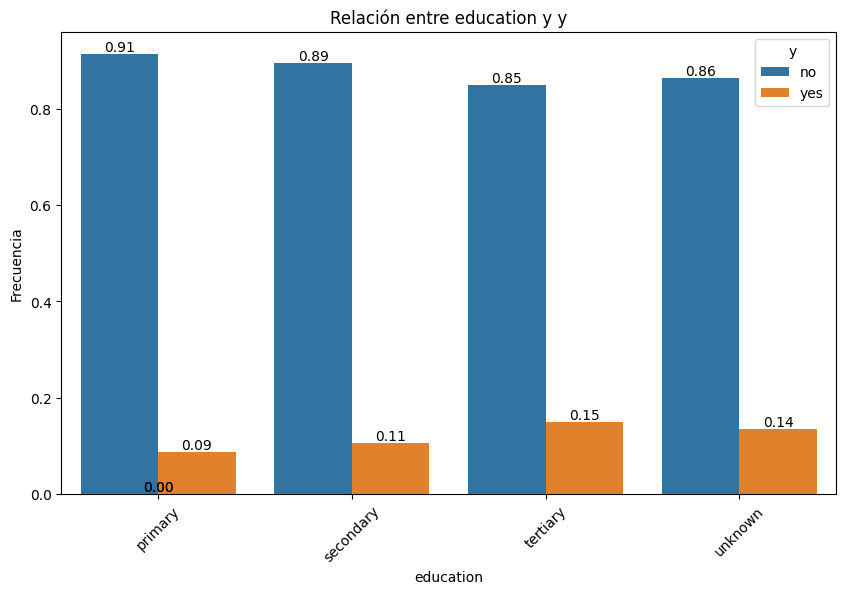

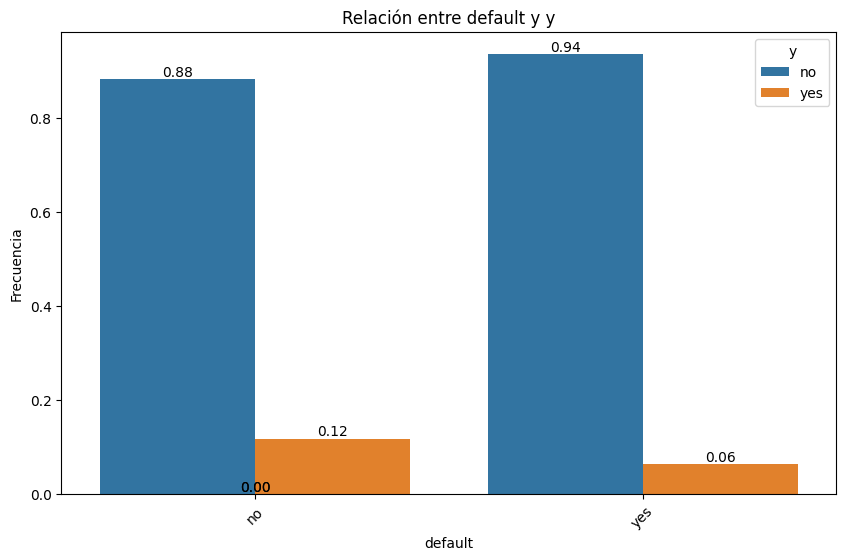

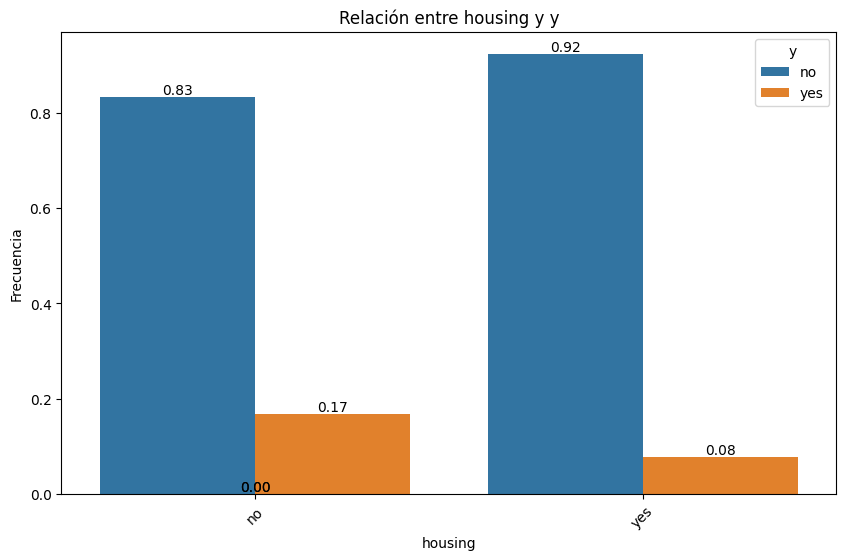

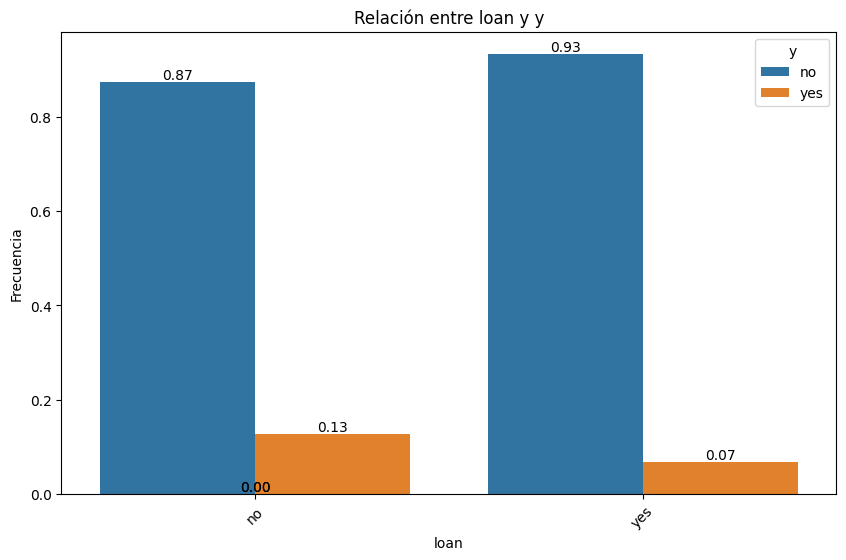

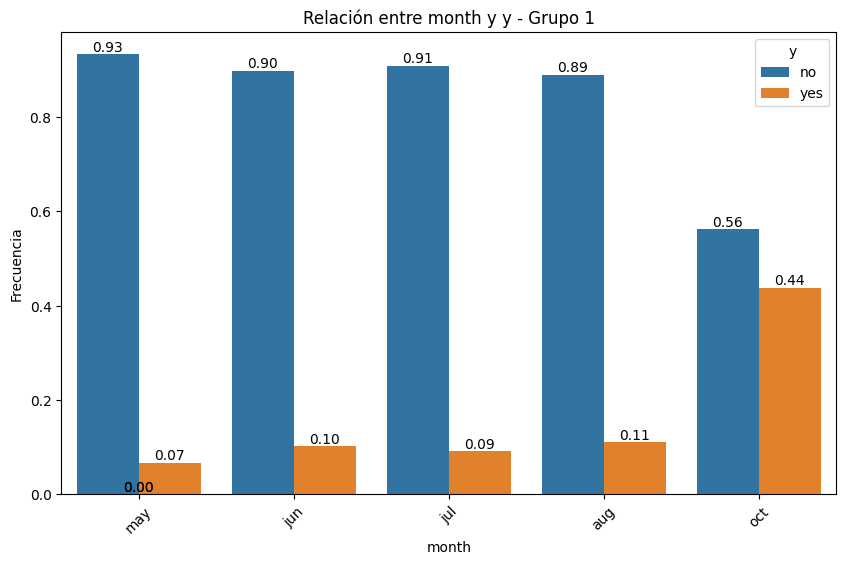

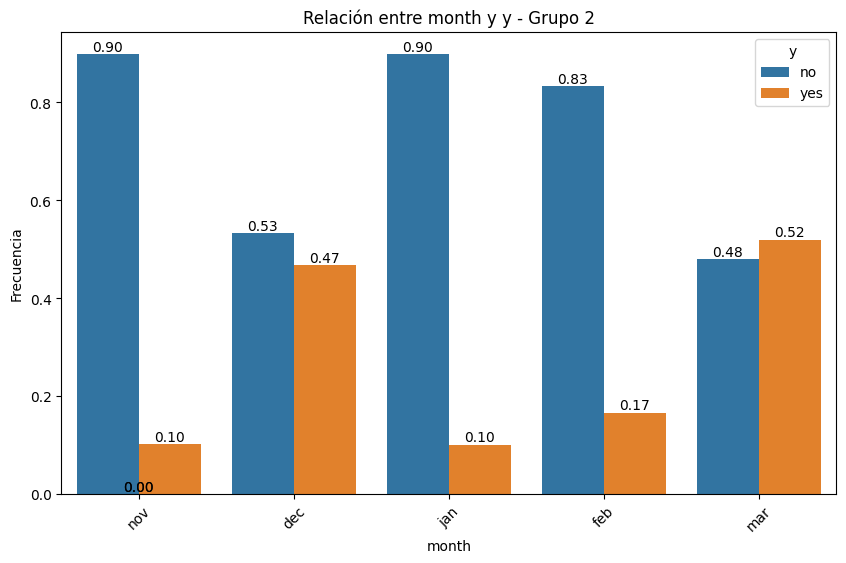

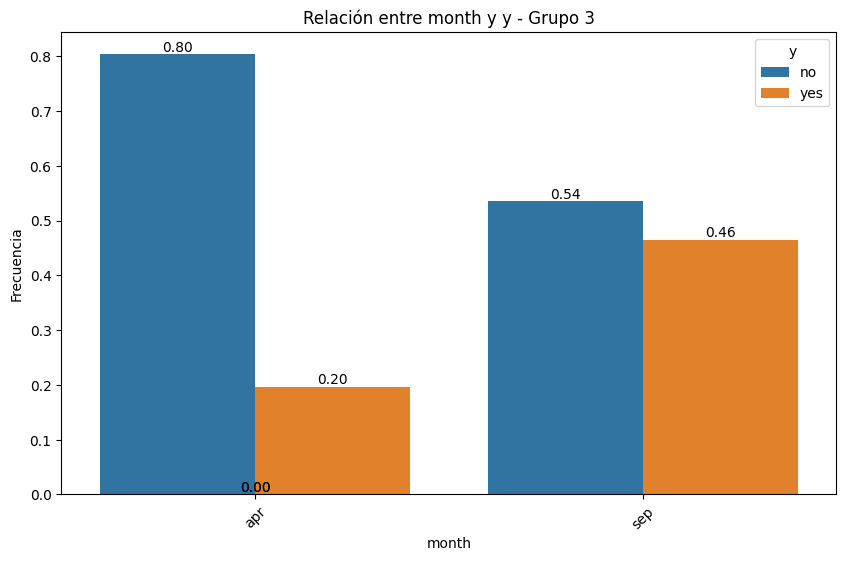

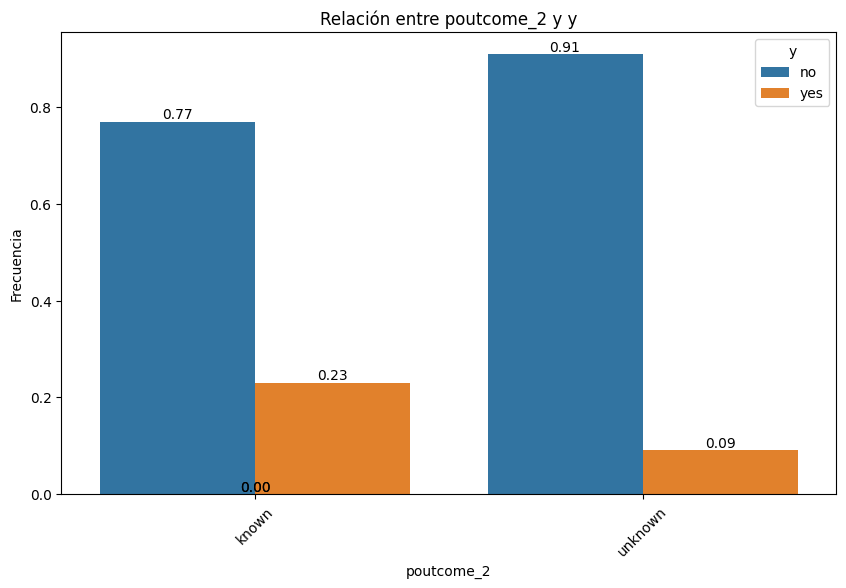

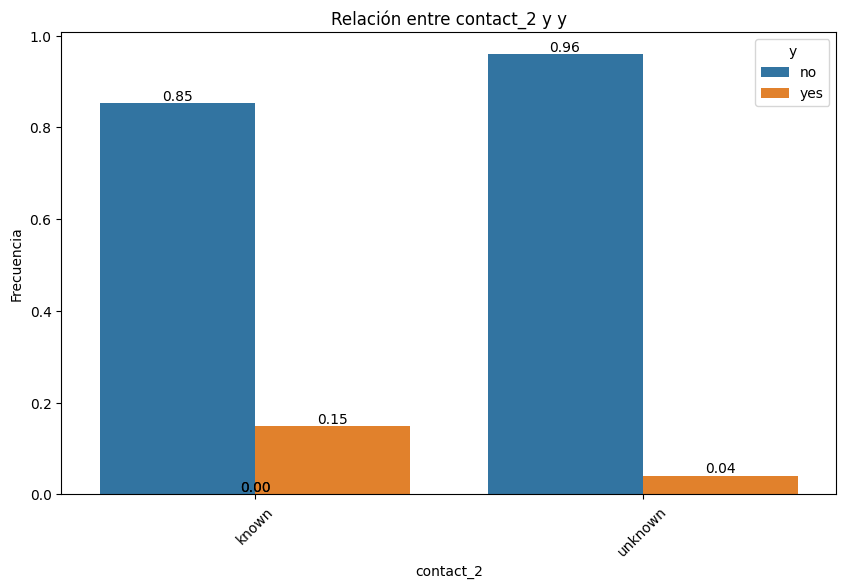

In [14]:
from bootcampviztools import *
for i in features_cat:
    plot_categorical_relationship_fin(df,i,"y",relative_freq=True,show_values=True)

In [15]:
features = features_cat + features_num
features

['marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome_2',
 'contact_2',
 'age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[features],df["y"],test_size=0.2,random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36168, 15) (9043, 15) (36168,) (9043,)


In [18]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

In [19]:
X_train

,marital,education,default,housing,loan,month,poutcome_2,contact_2,age,balance,day,duration,campaign,pdays,previous
3344,married,primary,no,yes,no,may,unknown,unknown,41,849,15,72,1,-1,0
17965,married,primary,no,yes,no,jul,unknown,known,49,1415,30,269,2,-1,0
18299,married,secondary,no,no,no,jul,unknown,known,42,3842,31,130,4,-1,0
10221,single,tertiary,no,yes,no,jun,unknown,unknown,37,-119,11,375,11,-1,0
32192,married,primary,no,no,no,apr,unknown,known,56,3498,15,264,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,single,primary,no,no,no,jun,unknown,unknown,44,1059,18,2093,1,-1,0
44732,single,tertiary,no,no,no,sep,known,known,23,508,8,210,1,92,1
38158,divorced,tertiary,no,yes,no,may,unknown,known,34,1317,15,239,1,-1,0
860,married,secondary,no,no,no,may,unknown,unknown,33,165,7,111,1,-1,0


In [20]:
X_train.marital.value_counts().index.to_list()

['married', 'single', 'divorced']

In [21]:
X_train.month.value_counts().index.to_list()

['may',
 'jul',
 'aug',
 'jun',
 'nov',
 'apr',
 'feb',
 'jan',
 'oct',
 'sep',
 'mar',
 'dec']

In [22]:
X_train.education.value_counts().index.to_list()

['secondary', 'tertiary', 'primary', 'unknown']

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["single","divorced","married"],['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],['unknown', 'primary','secondary', 'tertiary']])
X_train_encoded = ordinal_encoder.fit_transform(X_train[["marital","month","education"]])

X_train["marital"] = X_train_encoded[:, 0]
X_train["month"] = X_train_encoded[:, 1]
X_train["education"] = X_train_encoded[:, 2]

X_test_encoded = ordinal_encoder.transform(X_test[["marital","month","education"]])
X_test["marital"] = X_test_encoded[:, 0]
X_test["month"] = X_test_encoded[:, 1]
X_test["education"] = X_test_encoded[:, 2]
X_train["marital"].value_counts()

marital
2.0    21804
0.0    10221
1.0     4143
Name: count, dtype: int64

In [24]:
X_train

,marital,education,default,housing,loan,month,poutcome_2,contact_2,age,balance,day,duration,campaign,pdays,previous
3344,2.0,1.0,no,yes,no,4.0,unknown,unknown,41,849,15,72,1,-1,0
17965,2.0,1.0,no,yes,no,6.0,unknown,known,49,1415,30,269,2,-1,0
18299,2.0,2.0,no,no,no,6.0,unknown,known,42,3842,31,130,4,-1,0
10221,0.0,3.0,no,yes,no,5.0,unknown,unknown,37,-119,11,375,11,-1,0
32192,2.0,1.0,no,no,no,3.0,unknown,known,56,3498,15,264,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,1.0,no,no,no,5.0,unknown,unknown,44,1059,18,2093,1,-1,0
44732,0.0,3.0,no,no,no,8.0,known,known,23,508,8,210,1,92,1
38158,1.0,3.0,no,yes,no,4.0,unknown,known,34,1317,15,239,1,-1,0
860,2.0,2.0,no,no,no,4.0,unknown,unknown,33,165,7,111,1,-1,0


In [25]:
X_train = pd.get_dummies(X_train,columns=["default","housing","loan","poutcome_2","contact_2"])

In [26]:
X_test = pd.get_dummies(X_test,columns=["default","housing","loan","poutcome_2","contact_2"])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

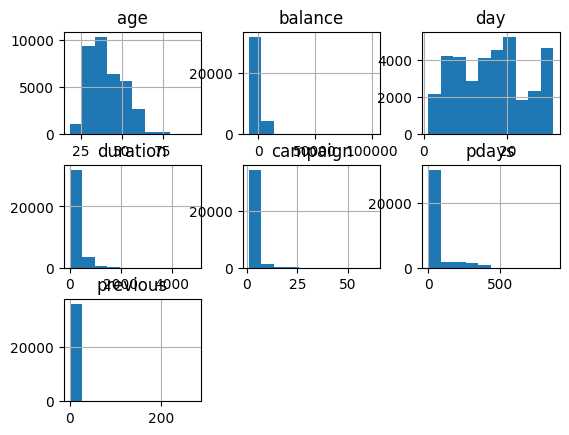

In [27]:
X_train[features_num].hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

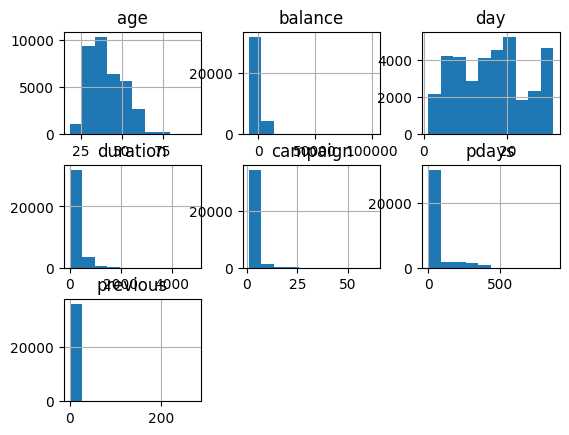

In [28]:
for col in features_num:
    X_train[col] = X_train[col].replace([np.inf, -np.inf], 0) 

    X_test[col] = X_test[col].replace([np.inf, -np.inf], 0)
X_train[features_num].hist()

In [29]:
X_train.drop(columns=["pdays","previous","balance","duration"],inplace=True)
X_test.drop(columns=["pdays","previous","balance","duration"],inplace=True)

In [30]:
features_num.remove("pdays")
features_num.remove("previous")
features_num.remove("balance")
features_num.remove("duration")

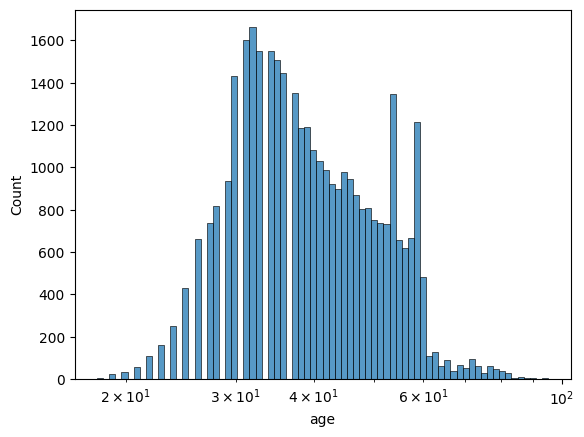

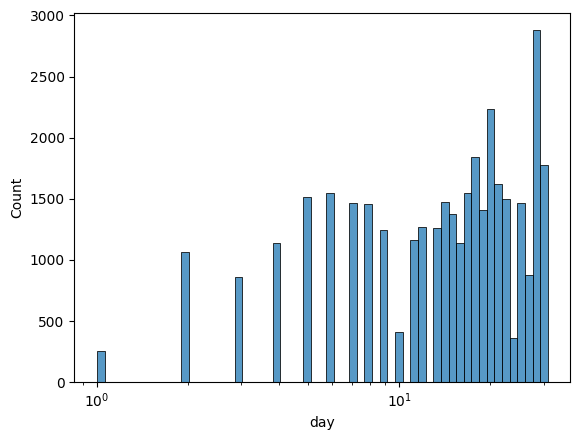

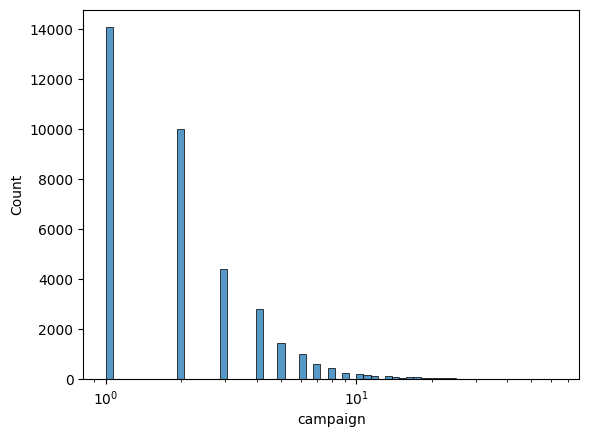

In [31]:
for i in features_num:
    plt.figure()
    sns.histplot(X_train[i],log_scale=True)
    plt.show()

In [32]:
X_train.loc[np.isinf(X_train[features_num]).any(axis=1)]

,marital,education,month,age,day,campaign,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_2_known,poutcome_2_unknown,contact_2_known,contact_2_unknown


In [33]:
X_train["age"] = X_train["age"].apply(np.log)
X_train["campaign"] = X_train["campaign"].apply(np.log)

In [34]:
X_train[features_num].describe()

,age,day,campaign
count,36168.000000,36168.000000,36168.000000
mean,3.679295,15.817739,0.706179
std,0.254585,8.325860,0.712843
min,2.890372,1.000000,0.000000
25%,3.496508,8.000000,0.000000
50%,3.663562,16.000000,0.693147
75%,3.871201,21.000000,1.098612
max,4.553877,31.000000,4.143135


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])

In [36]:
X_train[features_num].describe()

,age,day,campaign
count,3.616800e+04,3.616800e+04,3.616800e+04
mean,2.320540e-15,-5.599001e-18,5.058747e-17
std,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.098908e+00,-1.779749e+00,-9.906651e-01
25%,-7.179945e-01,-9.389838e-01,-9.906651e-01
50%,-6.180267e-02,2.189120e-02,-1.828173e-02
75%,7.538090e-01,6.224381e-01,5.505261e-01
max,3.435374e+00,1.823532e+00,4.821543e+00


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'campaign'}>, <Axes: >]], dtype=object)

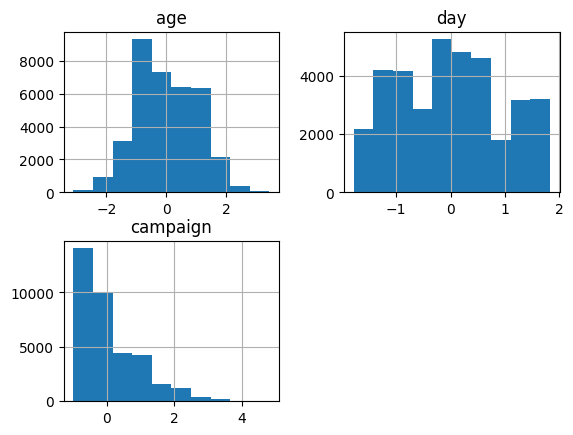

In [37]:
X_train[features_num].hist()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression( random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

Logistic Regression Accuracy: 0.16631648789118655
              precision    recall  f1-score   support

          no       0.94      0.06      0.10      7952
         yes       0.12      0.97      0.22      1091

    accuracy                           0.17      9043
   macro avg       0.53      0.51      0.16      9043
weighted avg       0.84      0.17      0.12      9043

Decision Tree Accuracy: 0.6685834347008736
              precision    recall  f1-score   support

          no       0.88      0.72      0.79      7952
         yes       0.12      0.28      0.17      1091

    accuracy                           0.67      9043
   macro avg       0.50      0.50      0.48      9043
weighted avg       0.79      0.67      0.72      9043



In [39]:
from sklearn.model_selection import RandomizedSearchCV,cross_validate
from sklearn.linear_model import ElasticNet

log_reg_1 = LogisticRegression(random_state=42)
tree_clf_1 = DecisionTreeClassifier(random_state=42)

param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": np.arange(0,1.1,0.1).tolist(),
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000, 20000, 30000]
}
param_grid_tree = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

elastic = ElasticNet()

random_Search_log_reg = RandomizedSearchCV(log_reg_1, param_distributions=param_grid_log_reg, n_iter=10, cv=5,scoring="r2", random_state=42, n_jobs=-1)
random_Search_tree = RandomizedSearchCV(tree_clf_1, param_distributions=param_grid_tree, n_iter=10, cv=5,scoring="r2", random_state=42, n_jobs=-1)


In [40]:
random_Search_log_reg.fit(X_train, y_train)
random_Search_tree.fit(X_train, y_train)

C:\Users\David\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\David\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\David\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\David\AppDat

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='r2')

In [41]:
random_Search_log_reg.best_estimator_

LogisticRegression(C=0.01, l1_ratio=0.2, max_iter=10000, random_state=42,
                   solver='liblinear')

In [42]:
log_reg_best = random_Search_log_reg.best_estimator_
log_reg_best.fit(X_train, y_train)
log_reg_best_pred = log_reg_best.predict(X_test)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_best_pred))
print(classification_report(y_test, log_reg_best_pred))

random_Search_tree.best_estimator_
tree_best = random_Search_tree.best_estimator_  
tree_best.fit(X_train, y_train)
tree_best_pred = tree_best.predict(X_test)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, tree_best_pred))
print(classification_report(y_test,tree_best_pred))

C:\Users\David\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Logistic Regression Accuracy: 0.14276235762468206
              precision    recall  f1-score   support

          no       0.95      0.03      0.05      7952
         yes       0.12      0.99      0.22      1091

    accuracy                           0.14      9043
   macro avg       0.54      0.51      0.13      9043
weighted avg       0.85      0.14      0.07      9043

Best Decision Tree Accuracy: 0.7814884441004092
              precision    recall  f1-score   support

          no       0.89      0.86      0.87      7952
         yes       0.18      0.23      0.20      1091

    accuracy                           0.78      9043
   macro avg       0.54      0.54      0.54      9043
weighted avg       0.80      0.78      0.79      9043

